In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, auc, confusion_matrix, roc_curve, RocCurveDisplay

# **Data exploration and visualization**

In [171]:
train_data = pd.read_csv("/kaggle/input/training-and-testing-data/train.csv")
test_data = pd.read_csv("/kaggle/input/training-and-testing-data/test.csv")

In [172]:
train_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [173]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938583 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         938583 non-null  float64
 1   header_size       938583 non-null  float64
 2   packet_duration   938583 non-null  float64
 3   overall_rate      938583 non-null  float64
 4   src_rate          938583 non-null  float64
 5   dst_rate          938583 non-null  float64
 6   fin_packets       938583 non-null  float64
 7   urg_packets       938583 non-null  float64
 8   rst_packets       938583 non-null  float64
 9   max_value         938583 non-null  float64
 10  value_covariance  938583 non-null  float64
 11  fin_flags         938583 non-null  int64  
 12  syn_flags         938583 non-null  int64  
 13  rst_flags         938583 non-null  int64  
 14  psh_flags         938583 non-null  int64  
 15  ack_flags         938583 non-null  int64  
 16  protocol_http     93

In [174]:
train_data.describe()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
train_data.duplicated().sum()

96187

In [176]:
train_data.drop_duplicates(inplace=True)

In [177]:
train_data.isna().sum()

flow_time           0
header_size         0
packet_duration     0
overall_rate        0
src_rate            0
dst_rate            0
fin_packets         0
urg_packets         0
rst_packets         0
max_value           0
value_covariance    0
fin_flags           0
syn_flags           0
rst_flags           0
psh_flags           0
ack_flags           0
protocol_http       0
protocol_https      0
protocol_tcp        0
protocol_udp        0
protocol_icmp       0
label               0
dtype: int64

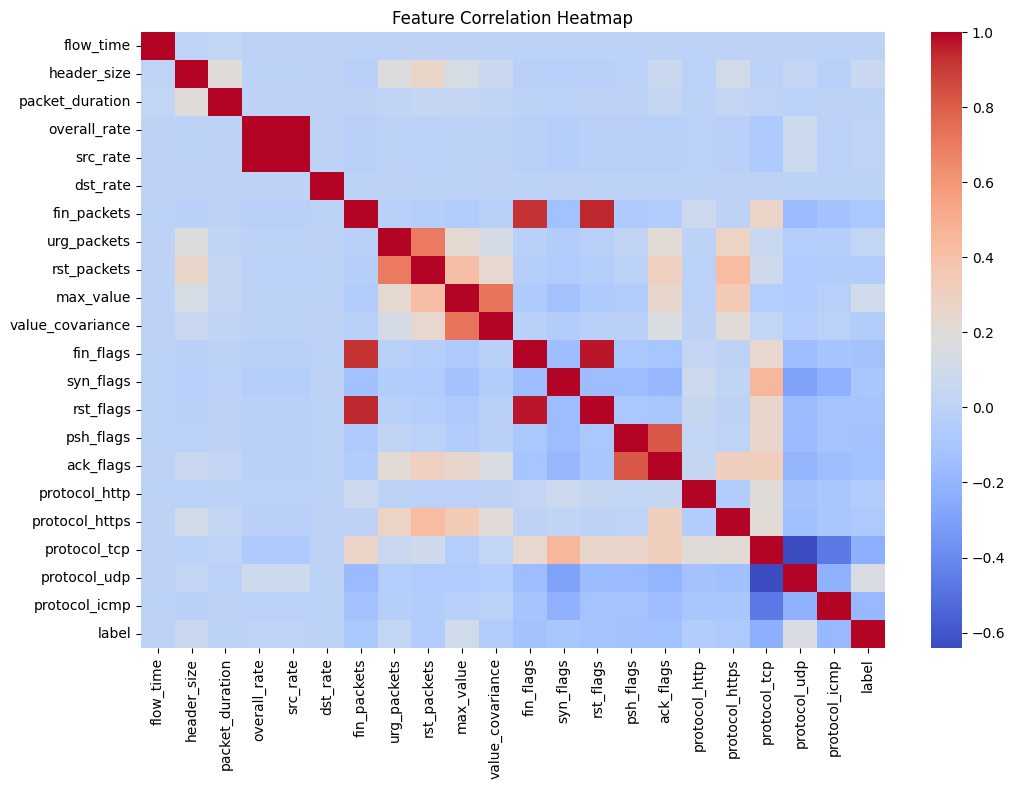

In [178]:
categorical_columns = train_data.select_dtypes(include=["object"]).columns.tolist()

le = LabelEncoder()
train_data["label"] = le.fit_transform(train_data["label"])

correlation_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [179]:
abs(correlation_matrix["label"]).sort_values(ascending=False)

label               1.000000
protocol_tcp        0.232204
protocol_icmp       0.178745
protocol_udp        0.150481
ack_flags           0.134799
fin_flags           0.128302
psh_flags           0.128180
rst_flags           0.110701
max_value           0.100210
syn_flags           0.094010
fin_packets         0.086056
protocol_https      0.075995
header_size         0.059832
rst_packets         0.056347
protocol_http       0.054522
value_covariance    0.045374
urg_packets         0.025589
overall_rate        0.009002
src_rate            0.009002
packet_duration     0.005567
flow_time           0.003094
dst_rate            0.001039
Name: label, dtype: float64

In [180]:
# train_data.hist(bins=20, figsize=(30,30))
# plt.show()

In [181]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(8, 3, figsize=(15, 30))
# axes = axes.flatten()

# for i in range(len(train_data.columns)):
#     axes[i].boxplot(train_data[train_data.columns[i]])
#     axes[i].set_title(f"{train_data.columns[i]} boxplot")

# for j in range(len(train_data.columns), len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


In [182]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(8, 3, figsize=(15, 30))
# axes = axes.flatten()

# for i in range(len(train_data.columns)):
#     axes[i].scatter(train_data[train_data.columns[i]], train_data['label'])
#     axes[i].set_title(f"{train_data.columns[i]} boxplot")

# for j in range(len(train_data.columns), len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


**Model Implementation** 

In [183]:
train_data.shape

(842396, 22)

In [184]:
# train_data.drop(columns=["overall_rate"], inplace=True)

In [185]:
x = train_data.drop(["label"], axis=1)
y = train_data["label"]

In [186]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, random_state=42, test_size = 0.4)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, random_state=42, test_size = 0.5)

In [187]:
x_train.shape

(505437, 21)

In [188]:
x_val.shape

(168479, 21)

In [189]:
x_test.shape

(168480, 21)

In [190]:
# from sklearn.preprocessing import RobustScaler
# robust = RobustScaler()
# scaled_columns_train= x_train[["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]]
# scaled_columns_val= x_val[["flow_time", "header_size", "packet_duration","src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]]
# scaled_columns_test= x_test[["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]]
# robust.fit(scaled_columns_train)
# x_train_scaled=robust.transform(scaled_columns_train)
# x_val_scaled=robust.transform(scaled_columns_val)
# x_test_scaled=robust.transform(scaled_columns_test)

In [191]:
# x_train.drop(columns=["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"], inplace=True)
# x_val.drop(columns=["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"], inplace=True)
# x_test.drop(columns=["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"], inplace=True)

In [192]:
x_train.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
818772,0.0,54.00,64.00,1.547835,1.547835,0.0,0.0,0.0,0.0,54.00,...,0,1,0,0,0,0,0,1,0,0
233886,0.0,53.46,63.36,22.488058,22.488058,0.0,0.0,0.0,0.0,54.24,...,0,0,0,0,0,0,0,1,0,0
784994,0.0,0.00,64.00,0.400758,0.400758,0.0,0.0,0.0,0.0,42.00,...,0,0,0,0,0,0,0,0,0,1
354186,0.0,54.00,64.00,0.396176,0.396176,0.0,0.0,1.0,1.0,54.00,...,0,0,0,1,1,0,0,1,0,0
859331,0.0,52.92,62.72,19.778090,19.778090,0.0,0.0,0.0,0.0,55.14,...,0,0,0,0,0,0,0,1,0,0


In [193]:
x_train.loc[:, ["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]] = x_train_scaled
x_val.loc[:, ["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]] = x_val_scaled
x_test.loc[:, ["flow_time", "header_size", "packet_duration", "src_rate", "fin_packets", "urg_packets", "rst_packets", "max_value", "value_covariance"]] = x_test_scaled

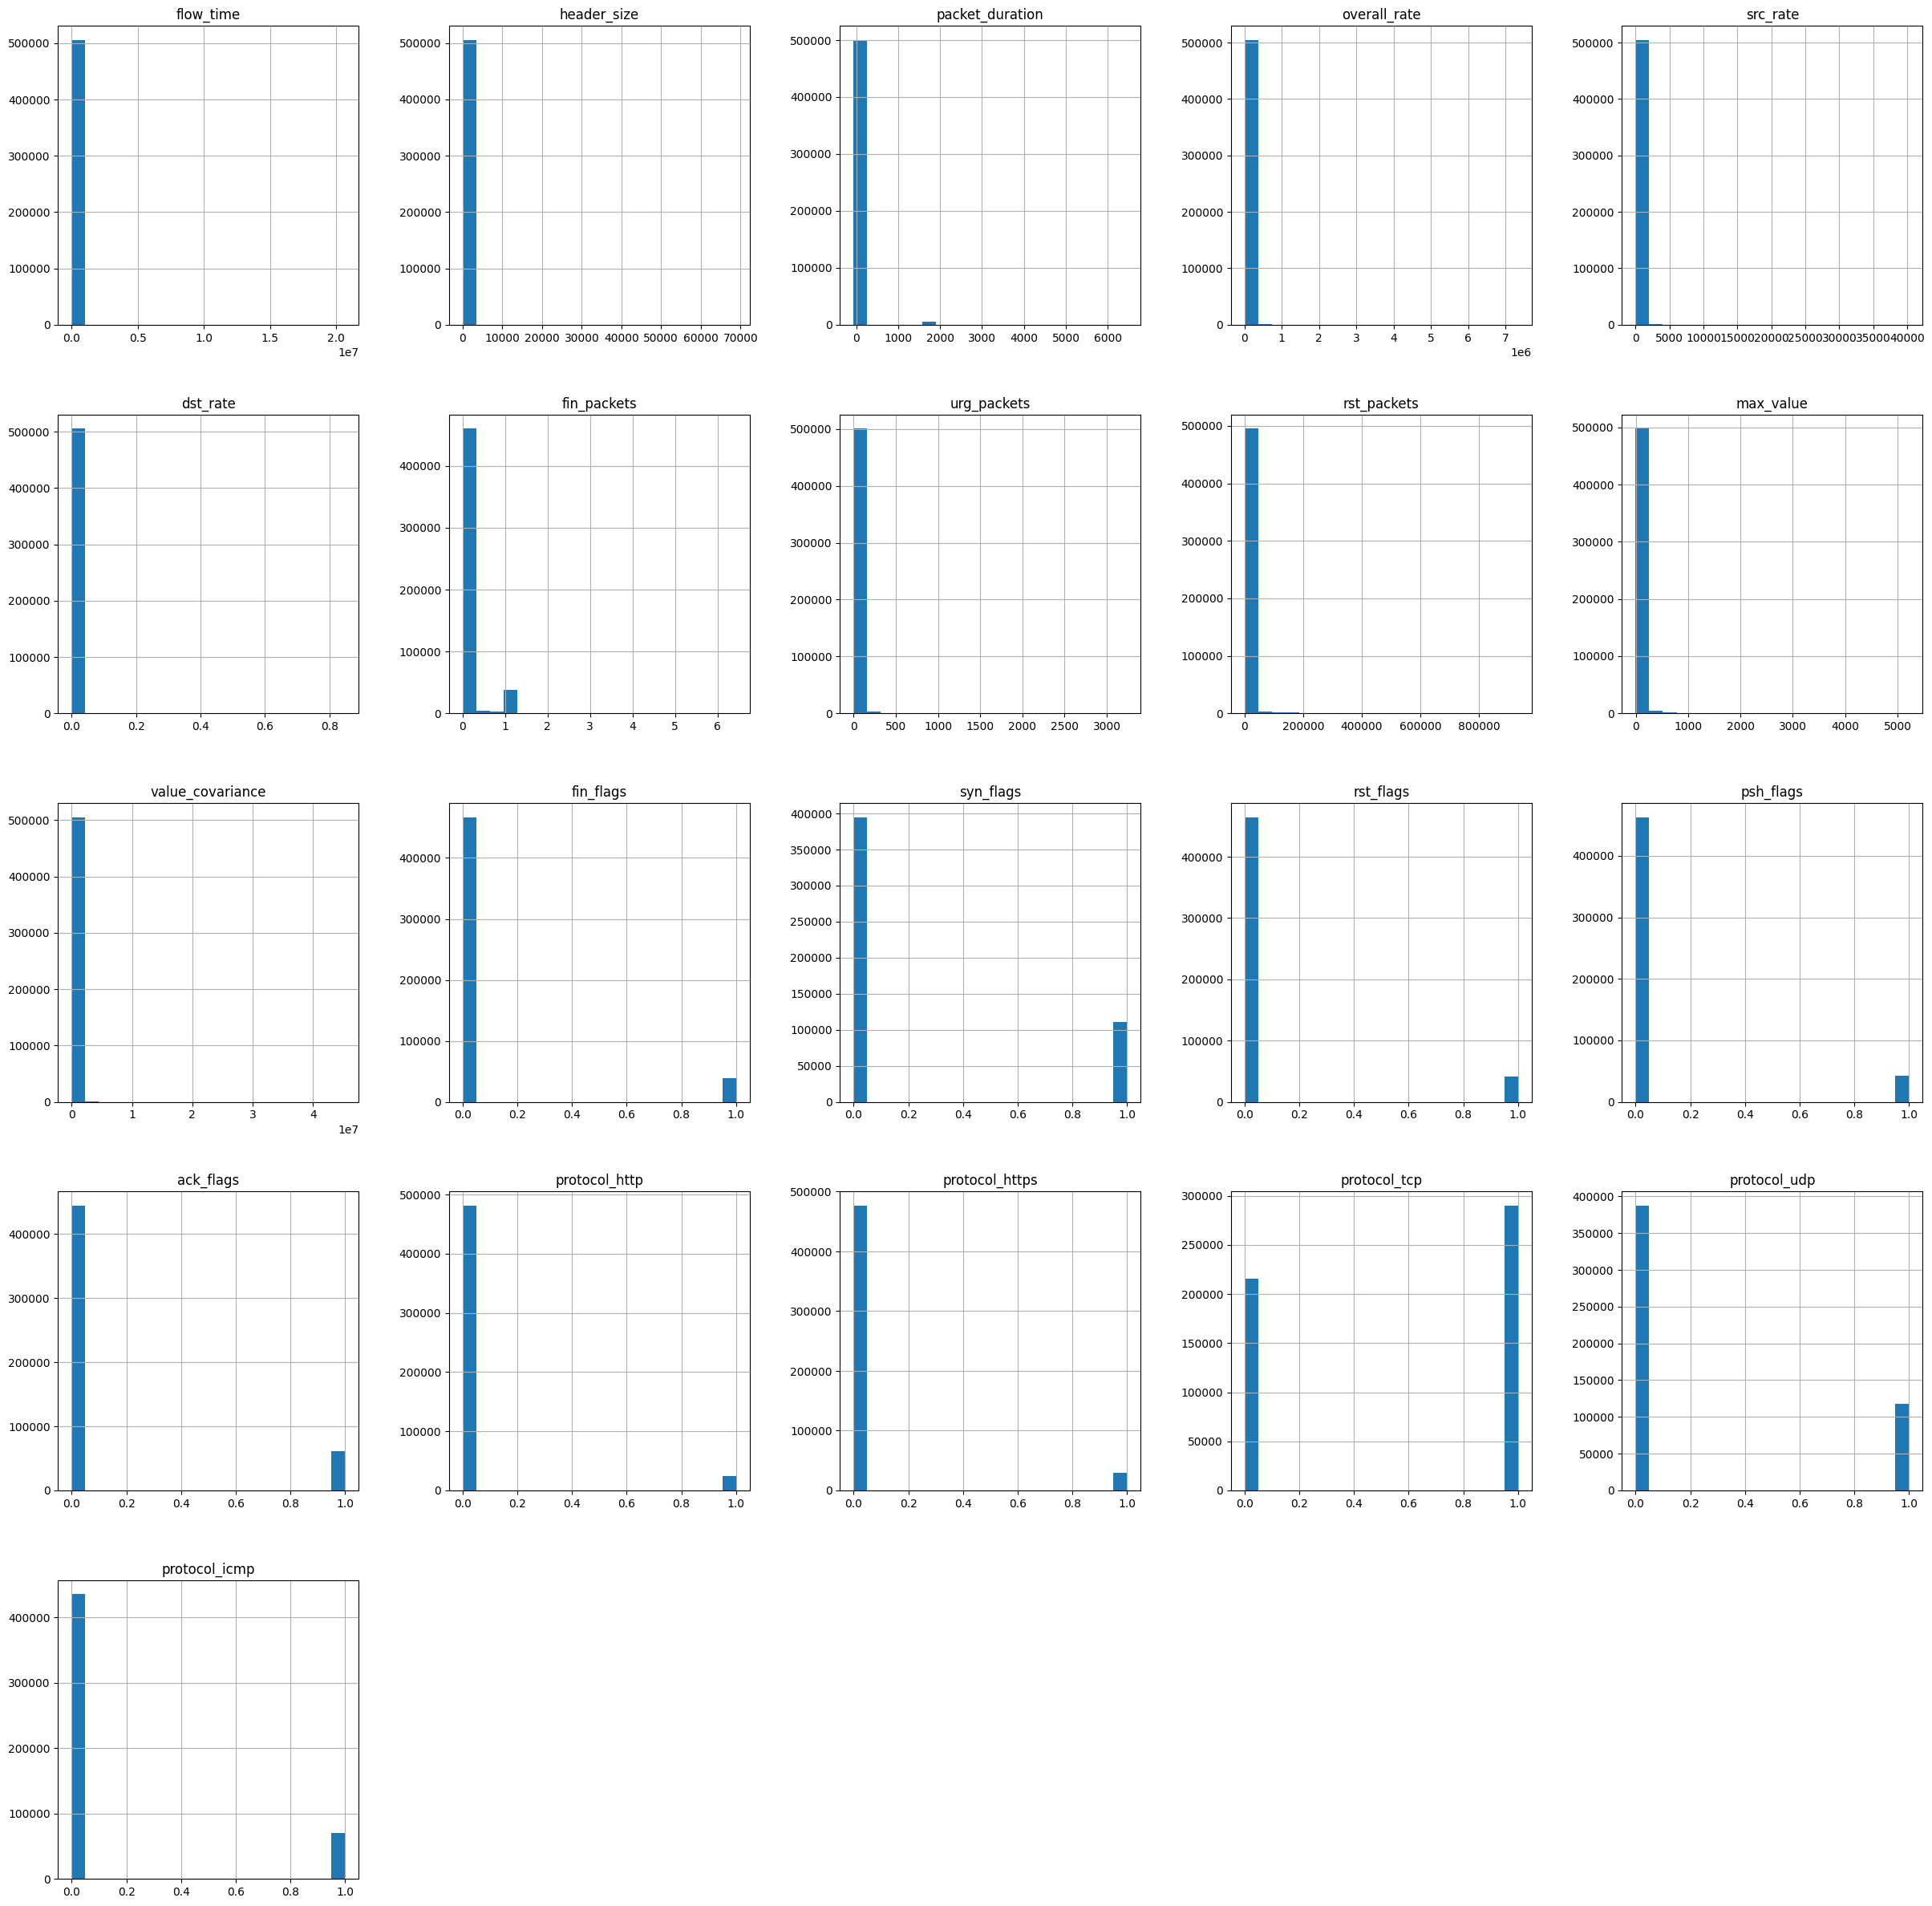

In [194]:
x_train.hist(bins=20, figsize=(30,30))
plt.show()

In [195]:
# # KNN
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(x_train, y_train)
# knn_pred = knn.predict(x_test)
# accuracy_knn = accuracy_score(y_test, knn_pred)
# print("Accuracy of KNN:", accuracy_knn)
# precision_knn = precision_score(y_test, knn_pred, average="macro")
# print("Precision of KNN:", precision_knn)
# recall_knn = recall_score(y_test, knn_pred, average="macro")
# print("Recall of KNN:", recall_knn)
# f1_score_knn = f1_score(y_test, knn_pred, average="macro")
# print("F1 score of KNN:", f1_score_knn)
# confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
# print("Confusion Matrix of KNN:\n")
# print(confusion_matrix_knn)

In [196]:
test_data.drop(columns=["Id"], inplace=True)

In [205]:
train_data.head(30)

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,1
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,1
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,2
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,2
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,2
5,76.603794,309718.20,66.60,13.144153,13.144153,0.0,0.0,79.80,402.20,137.20,...,0,0,0,0,0,0,0,0,0,0
6,2.606116,678482.03,64.41,173.380455,173.380455,0.0,0.0,0.09,0.22,1479.44,...,0,0,0,0,0,0,0,0,0,1
7,0.056987,69.70,64.00,1.200560,1.200560,0.0,0.0,0.02,0.03,289.44,...,0,0,0,0,0,0,1,0,0,1
8,0.000000,0.00,64.00,70.234584,70.234584,0.0,0.0,0.00,0.00,1514.00,...,0,0,0,0,0,0,0,0,1,1
9,0.000000,54.00,64.00,0.418054,0.418054,0.0,0.0,0.00,0.00,54.00,...,1,0,0,0,0,0,1,0,0,1


In [198]:
test_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
0,0.000000,54.0,64.0,249.534700,249.534700,0.0,0.0,0.0,0.0,54.0,...,0,0,0,0,0,0,0,1,0,0
1,4.466080,108.0,64.0,0.447820,0.447820,0.0,0.0,0.0,0.0,54.0,...,0,1,0,0,0,0,0,1,0,0
2,0.000000,54.0,64.0,1.295361,1.295361,0.0,0.0,1.0,1.0,54.0,...,0,0,0,1,1,0,0,1,0,0
3,0.000000,0.0,64.0,2.249081,2.249081,0.0,0.0,0.0,0.0,42.0,...,0,0,0,0,0,0,0,0,0,1
4,4.413071,108.0,64.0,0.453199,0.453199,0.0,0.0,0.0,0.0,54.0,...,0,0,0,0,0,0,0,1,0,0


In [199]:
test_data.shape

(104287, 21)

In [200]:
x_train.shape

(505437, 21)

In [201]:
test_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
0,0.000000,54.0,64.0,249.534700,249.534700,0.0,0.0,0.0,0.0,54.0,...,0,0,0,0,0,0,0,1,0,0
1,4.466080,108.0,64.0,0.447820,0.447820,0.0,0.0,0.0,0.0,54.0,...,0,1,0,0,0,0,0,1,0,0
2,0.000000,54.0,64.0,1.295361,1.295361,0.0,0.0,1.0,1.0,54.0,...,0,0,0,1,1,0,0,1,0,0
3,0.000000,0.0,64.0,2.249081,2.249081,0.0,0.0,0.0,0.0,42.0,...,0,0,0,0,0,0,0,0,0,1
4,4.413071,108.0,64.0,0.453199,0.453199,0.0,0.0,0.0,0.0,54.0,...,0,0,0,0,0,0,0,1,0,0


In [202]:
test_data.columns

Index(['flow_time', 'header_size', 'packet_duration', 'overall_rate',
       'src_rate', 'dst_rate', 'fin_packets', 'urg_packets', 'rst_packets',
       'max_value', 'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags',
       'psh_flags', 'ack_flags', 'protocol_http', 'protocol_https',
       'protocol_tcp', 'protocol_udp', 'protocol_icmp'],
      dtype='object')

In [203]:
x_train.columns

Index(['flow_time', 'header_size', 'packet_duration', 'overall_rate',
       'src_rate', 'dst_rate', 'fin_packets', 'urg_packets', 'rst_packets',
       'max_value', 'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags',
       'psh_flags', 'ack_flags', 'protocol_http', 'protocol_https',
       'protocol_tcp', 'protocol_udp', 'protocol_icmp'],
      dtype='object')

In [204]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(test_data)

KeyboardInterrupt: 

In [ ]:
output_df = pd.DataFrame()
knn_pred_values = []
ids  = []
# class_names = le.inverse_transform(knn_pred)
for i in range(len(knn_pred)):
    ids.append(i)
    if knn_pred[i] == 0:
        knn_pred_values.append("DoS")
    if knn_pred[i]==1:
        knn_pred_values.append("DDoS")
    if knn_pred[i]==2:
        knn_pred_values.append("BenignTraffic")
    if knn_pred[i]==3:
        knn_pred_values.append("Mirai")
    if knn_pred[i]==4:
        knn_pred_values.append("Recon")
    if knn_pred[i]==5:
        knn_pred_values.append("MITM")

output_df["ID"] = ids
output_df["Target"] = class_names
output_df = output_df[["ID", "Target"]]
output_df.to_csv("knn oooutputttttt.csv")

In [ ]:
output_df.head()

In [ ]:
len(output_df)

In [ ]:
# svm = SVC(class_weight='balanced',kernel="linear")
# svm.fit(x_train, y_train)

# svm_pred_scores = svm.predict(x_test)

# svm_pred = (svm_pred_scores >= 0.6).astype(int)

# accuracy_svm = accuracy_score(y_test, svm_pred)
# print("Accuracy of SVM:", accuracy_svm)

# precision_svm = precision_score(y_test, svm_pred)
# print("Precision of SVM:", precision_svm)

# recall_svm = recall_score(y_test, svm_pred)
# print("Recall of SVM:", recall_svm)

# f1_score_svm = f1_score(y_test, svm_pred)
# print("F1 score of SVM:", f1_score_svm)

In [ ]:
# Logistic regressor

logistic = LogisticRegressionCV(class_weight='balanced')
logistic.fit(x_train, y_train)
logistic_pred_scores = logistic.predict(x_test)
logistic_pred = (logistic_pred_scores >= 0.6).astype(int)
accuracy_logistic = accuracy_score(y_test, logistic_pred)
print("Accuracy of Logistic regressor:", accuracy_logistic)
precision_logistic = precision_score(y_test, logistic_pred)
print("Precision of Logistic regressor:", precision_logistic)
recall_logistic = recall_score(y_test, logistic_pred)
print("Recall of Logistic regressor:", recall_logistic)
f1_score_logistic = f1_score(y_test, logistic_pred)
print("F1 score of Logistic regressor:", f1_score_logistic)
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, logistic_pred)
auc_logistic = auc(recall_logistic, precision_logistic)
print("AUC of Logistic regressor:", auc_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix of Logistic regressor:")
print(confusion_matrix_logistic)

In [ ]:
multiclass=MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='sgd', max_iter=500, random_state=42)

multiclass.fit(x_train, y_train)

y_predict = multiclass.predict(x_test)

In [ ]:
accuracy_neural_network = accuracy_score(y_test, y_predict)
print("Accuracy of Neural Network:", accuracy_neural_network)
precision_neural_network = precision_score(y_test, y_predict, average='macro')
print("Precision of Neural Network:", precision_neural_network)
recall_neural_network = recall_score(y_test, y_predict, average='macro')
print("Recall of Neural Network:", recall_neural_network)
f1_score_neural_network = f1_score(y_test, y_predict, average='macro')
print("F1 score of Neural Network:", f1_score_neural_network)
confusion_matrix_neural_network = confusion_matrix(y_test, y_predict)
print("Confusion Matrix of Neural Network:\n")
print(confusion_matrix_neural_network)